In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
print(pd.__version__)
print(np.__version__)

2.2.0
1.25.2


Loading the data.

In [6]:
iris = pd.read_csv('../../Downloads/Data for ML/iris.csv')
print(iris.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Plotting the data. 

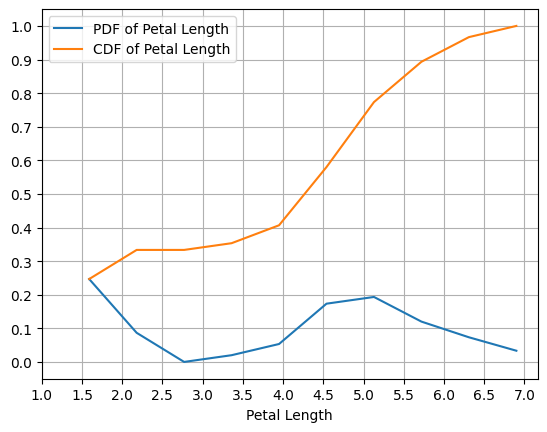

In [7]:
pl = iris['petal.length']
count, bin_edges = np.histogram(pl)
pdf_pl = count/len(pl)
cdf_pl = np.cumsum(pdf_pl)

plt.plot(bin_edges[1:], pdf_pl, label='PDF of Petal Length')
plt.plot(bin_edges[1:], cdf_pl, label='CDF of Petal Length')

plt.xlabel('Petal Length')
plt.xticks(ticks=np.arange(1.0, 7.5, 0.5))
plt.yticks(ticks=np.arange(0, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

In [8]:
mean_pl: float = (np.mean(pl))
std_pl: float = np.std(pl)
variance_pl: float = np.var(pl)
median_pl: float = np.median(pl)
mode_pl: float = np.max(pl)
skewness_pl: float = (mean_pl - mode_pl)/std_pl
print(f'{mean_pl =  }, {std_pl = }, {variance_pl = }, {median_pl = }, {skewness_pl = }')

mean_pl =  3.7580000000000005, std_pl = 1.759404065775303, variance_pl = 3.0955026666666665, median_pl = 4.35, skewness_pl = -1.7858319536254108


Standardization of Petal length. 
Standardizing data in machine learning is important for several reasons:
1. Meaningful Comparison: Standardizing data allows for meaningful comparison between different features. It removes the units of measurement, ensuring that each feature contributes equally to the analysis.
2. Algorithm Sensitivity: Some machine learning algorithms are sensitive to the scale of the input features. Standardizing the data helps prevent features with larger scales from dominating those with smaller scales, which can improve the performance and stability of the model.
3. Convergence: Standardizing data can help algorithms converge more quickly. Algorithms like gradient descent converge faster when the features are on a similar scale, as they don't have to take overly large steps in one direction due to differences in scale.
4. Regularization: Regularization techniques, such as L1 or L2 regularization, penalize large coefficients. Standardizing the data ensures that all features are on the same scale, so the regularization penalty is applied fairly across all features.
5. Interpretability: Standardizing data can improve the interpretability of the model. Coefficients in models like linear regression represent the change in the target variable for a one-unit change in the feature. Standardizing features ensures that this change is consistent across all features.

Using Numpy

In [9]:
stand_pl = (pl - mean_pl)/std_pl
# print(f'{stand_pl.round(2) = }')

Using scikit-learn 

In [10]:
pl_array = pl.values.copy()
pl_array.shape = (len(pl_array),1)
scaler = StandardScaler()
pl_std = scaler.fit_transform(pl_array)
# print(f'{pl_std.round(2) = }')

Central Limit Theorem.

-> The relationship between the population variance and the sample variance is approximately given by the formula: population variance ≈ sample size * sample variance. This relationship holds under certain conditions, such as when the sample is representative of the population.

-> While the distribution of the population may not be normal, the sample distribution often tends to approximate a normal distribution, especially when the sample size is large. This is known as the Central Limit Theorem, which states that the distribution of the sample means approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution.

sam_mean = 4.42, sam_var = 0.27, pop_mean = 4.41, pop_var = 8.32, hypo_var_pop = 8.19


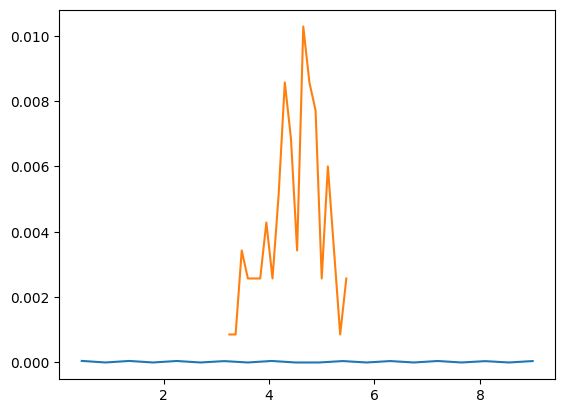

In [11]:
population : np.ndarray = np.random.randint(0, 10,size=5000)
count, bins = np.histogram(population, bins=20, density=True)
pdf = count/len(population)
plt.plot(bins[1:], pdf)
pop_mean = np.mean(population)
pop_var = np.var(population)

sample: list[float] = []
for i in range(100): 
    points: np.array = np.random.choice(population, size=30, replace=False)
    sample.append(points.mean())

count_sample, bins_sample= np.histogram(sample, bins=20, density=True)
pdf_ = count_sample/len(sample)
sam_mean = np.mean(sample)
sam_var = np.var(sample)
hypo_var_pop = sam_var*30
print(f'sam_mean = {sam_mean:.2f}, sam_var = {sam_var:.2f}, pop_mean = {pop_mean:.2f}, pop_var = {pop_var:.2f}, hypo_var_pop = {hypo_var_pop:.2f}')
plt.plot(bins_sample[1:], pdf_)
plt.show()

Quantile - Quantile plot 

101


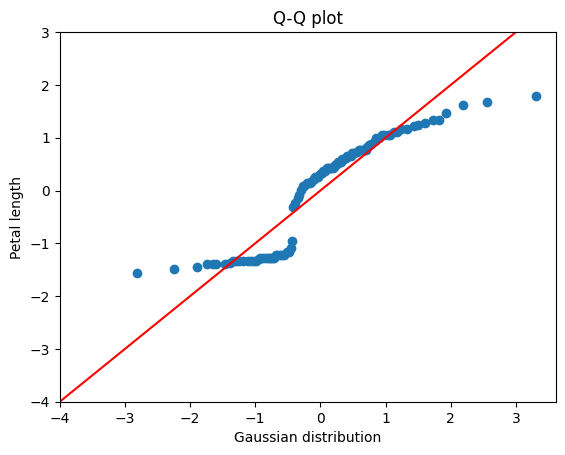

In [12]:
srt = np.sort(pl_std, axis=0)
dataset = np.array(())
for i in range(101):
    dataset = np.append(dataset, np.percentile(srt,i))
print(len(dataset))
measurement = np.random.normal(loc=0, scale=1, size=1000)
dataset2 = np.array(())
for i in range(101):
    dataset2 = np.append(dataset2, np.percentile(measurement, i))
plt.scatter(dataset2, dataset)
plt.axline((0, 0), slope = 1, color = 'red')
plt.xticks(np.arange(-4, 4, 1))
plt.yticks(np.arange(-4, 4, 1))
plt.xlabel('Gaussian distribution')
plt.ylabel('Petal length')
plt.title("Q-Q plot")
plt.show()

Using scipy

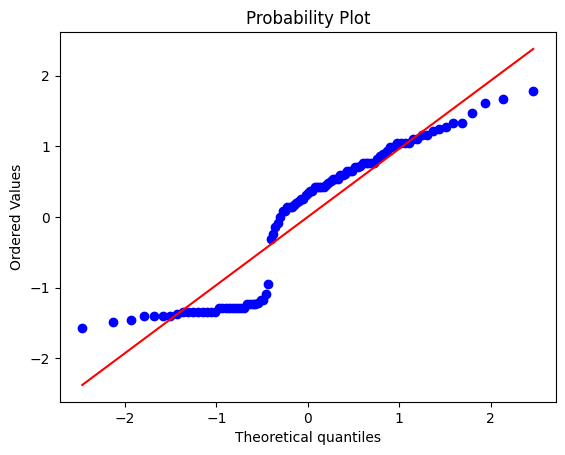

In [13]:
import scipy.stats as stats
a = stats.probplot(dataset, dist="norm", plot=plt)
plt.show()

How to randomly select elements of an array with NumPy in Python?

In [14]:
arr = np.arange(0,1000,1)
rand_choice = np.random.choice(arr, size=5, replace=True)
print(rand_choice)

arr2 = np.array(['Python', 'Java', 'C', 'PHP', 'Ruby'])
rand_choice2 = np.random.choice(arr2, size = (2,2), replace=True, p=[0.1,0.2,0.2,0.2,0.3])
print(rand_choice2)

[161 644 739 232 324]
[['Ruby' 'PHP']
 ['Ruby' 'PHP']]


log-normal distribution

How to check if the plot is showing log-normal distribution? 

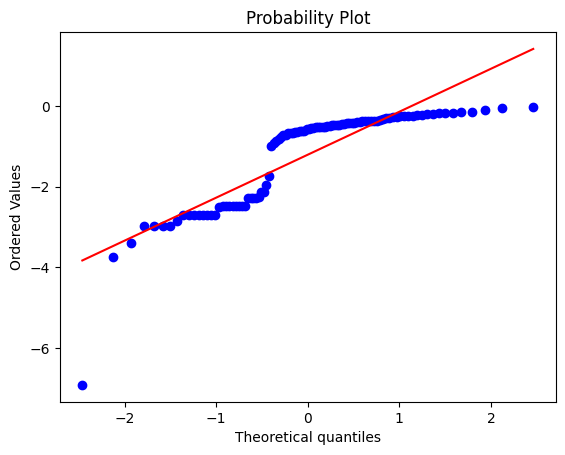

In [15]:
norm_pl_array = (pl_array - pl_array.min())/(np.max(pl_array) - np.min(pl_array))
dataset = np.array(())
for i in range(len(norm_pl_array)):
    if norm_pl_array[i] == 0:
        norm_pl_array[i] = 0.001
log_norm_pl_array = np.log(norm_pl_array)
for i in range(100):
    dataset = np.append(dataset, np.percentile(log_norm_pl_array, i))
a = stats.probplot(dataset, dist="norm", plot=plt)
plt.show()

Pareto distribution or Power law 

To check if the distribution is pareto or not --> You can use Box-cox transform.  

4.434754151341517


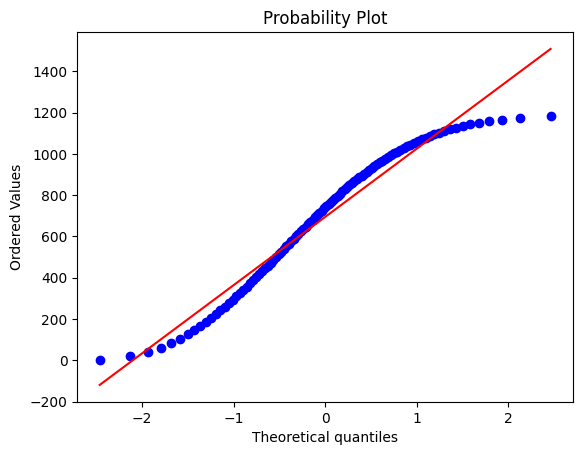

In [16]:
new_data = np.arange(5,1000,1)
new_data = np.log(new_data)
pl_box_cox, lamb = stats.boxcox(new_data)
print(lamb)
dataset = np.array(())
for i in range(100):
    dataset = np.append(dataset, np.percentile(pl_box_cox, i))
a = stats.probplot(dataset, dist="norm", plot=plt)
plt.show()

Co-variance, Pearson correlation coefficient, Spearman rank correlation

[[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]
Covariance: 1.2956093959731545
[[1.         0.96286543]
 [0.96286543 1.        ]]
Pearson Correlation Coefficient: 0.9628654314027963
SignificanceResult(statistic=0.9376668235763412, pvalue=8.156596854126675e-70)
Spearman rank correlation: 0.9376668235763412


Text(1, 2.2, 'Spearman rank correlation: 0.938')

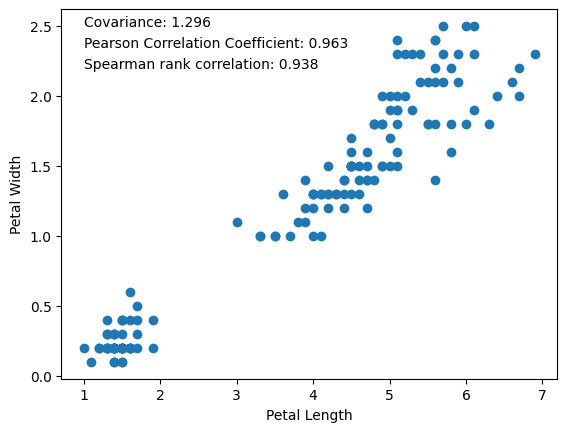

In [17]:
pl = iris['petal.length']
pw = iris['petal.width']
pl_array = pl.values.copy()
pw_array = pw.values.copy()

cov_pl_pw = np.cov(pl_array, pw_array)
print(cov_pl_pw)
print(f'Covariance: {cov_pl_pw[0][1]}')

pea_pl_pw = np.corrcoef(pl_array, pw_array)
print(pea_pl_pw)
print(f'Pearson Correlation Coefficient: {pea_pl_pw[0][1]}')

spe_pl_pw = stats.spearmanr(pl_array, pw_array)
print(spe_pl_pw)
print(f'Spearman rank correlation: {spe_pl_pw[0]}')

plt.scatter(pl_array, pw_array, label=f"Pearson Correlation Coefficient: {pea_pl_pw[0][1]:.2f}")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.annotate(f"Covariance: {cov_pl_pw[0][1]:.3f}", xy=(1, 2.5))
plt.annotate(f"Pearson Correlation Coefficient: {pea_pl_pw[0][1]:.3f}", xy=(1, 2.35))
plt.annotate(f"Spearman rank correlation: {spe_pl_pw[0]:.3f}", xy=(1, 2.2))

Confidence Interval

Bootstrapping is a resampling approach that's based on the central limit theorem (CLT). The CLT states that the distribution of sample means will approximate a normal distribution as the sample size gets larger, regardless of the population's distribution. Bootstrapping estimates the sampling distribution by taking multiple samples with replacement from a single random sample. These repeated samples are called resamples, and each resample is the same size as the original sample.

In [18]:
# Using scipy
data = pl.values.tolist()
data = (data,) # Converting into tuple
std_pl = stats.bootstrap(data, np.std, confidence_level=0.9)
mean_pl = stats.bootstrap(data, np.mean, confidence_level=0.9)
var_pl = stats.bootstrap(data, np.var, confidence_level=0.9)
median_pl = stats.bootstrap(data, np.median, confidence_level=0.9)
print(std_pl)
print(f'Mean of petal length with 90% confidence = {mean_pl.confidence_interval}')
print(f'Variance of petal length with 90% confidence = {var_pl.confidence_interval}')
print(f'Median of petal length with 90% confidence = {median_pl.confidence_interval}')

BootstrapResult(confidence_interval=ConfidenceInterval(low=1.66800818040542, high=1.8560290449914418), bootstrap_distribution=array([1.8156167 , 1.71549798, 1.70180414, ..., 1.78798459, 1.68748333,
       1.74797356]), standard_error=0.057461147853797585)
Mean of petal length with 90% confidence = ConfidenceInterval(low=3.520666666666666, high=3.990666666666667)
Variance of petal length with 90% confidence = ConfidenceInterval(low=2.78937473777536, high=3.438685985451065)
Median of petal length with 90% confidence = ConfidenceInterval(low=4.0, high=4.5)


Hypothesis testing

K-S test (Kolmogorov-Smirnov Test) --> Used to see the similarity of two distributions.

In [29]:
print(norm_pl_array.shape)
norm_pl_array.shape = (150,)
stats.kstest(norm_pl_array, 'norm')

(150, 1)


KstestResult(statistic=0.500398942213911, pvalue=2.922989860683221e-35, statistic_location=0.001, statistic_sign=-1)

Resampling and permutation test

In [69]:
import random
city1 : list[int] = []
city2 : list[int] = []

for i in range(1500):
    ele1 = random.randint(100,200)
    ele2 = random.randint(125,225)
    city1.append(ele1)
    city2.append(ele2)

# exp setup
ran_sam_city1 = random.sample(city1, 50)
ran_sam_city2 = random.sample(city2, 50)

# test statistics
mean_diff = sum(ran_sam_city2)/len(ran_sam_city2) - sum(ran_sam_city1)/len(ran_sam_city1)

# Null Hypothesis is there is no difference in population mean
# Resampling
ran_sam = ran_sam_city1.extend(ran_sam_city2)
mean_diff_sam = []
for i in range(1000):
    s1 = []
    s2 = []
    for j in range(len(ran_sam_city1)):
        s1.append(random.choice(ran_sam_city1))
        s2.append(random.choice(ran_sam_city2))
    diff = sum(s2)/len(s2) - sum(s1)/len(s1)
    mean_diff_sam.append(diff)
l1 =[]
mean_diff_sam = sorted(mean_diff_sam)
for i in range(len(mean_diff_sam)):
    if mean_diff_sam[i] - mean_diff > 0:
        l1.append(mean_diff_sam.index(mean_diff_sam[i]))
print(f'Mean difference between samples: {mean_diff:.3f}, And the p-value: {len(l1)/len(mean_diff_sam)}')

Mean difference between samples: 16.640, And the p-value: 0.018
